Little sript to use matplotlib, seaborn and a wordcloud. This the first part of my script. The next version is coming soon...

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#import dataset
df = pd.read_csv("../input/SouthAfricaCrimeStats_v2.csv")#,header=0)

#Name of column
print('list of features:', df.columns.values)

list of features: ['Province' 'Station' 'Category' '2005-2006' '2006-2007' '2007-2008'
 '2008-2009' '2009-2010' '2010-2011' '2011-2012' '2012-2013' '2013-2014'
 '2014-2015' '2015-2016']


In [2]:
print('Simple statistics for float features')
print(df.describe())

Simple statistics for float features
          2005-2006     2006-2007     2007-2008     2008-2009     2009-2010  \
count  30861.000000  30861.000000  30861.000000  30861.000000  30861.000000   
mean      70.527753     69.301610     67.154305     68.756165     69.517773   
std      205.491698    198.037635    186.760510    187.173860    185.514638   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      1.000000   
50%        8.000000      8.000000      8.000000      9.000000      9.000000   
75%       49.000000     50.000000     50.000000     52.000000     54.000000   
max     6692.000000   6341.000000   6316.000000   6803.000000   6571.000000   

          2010-2011     2011-2012     2012-2013     2013-2014     2014-2015  \
count  30861.000000  30861.000000  30861.000000  30861.000000  30861.000000   
mean      67.766696     68.259616     69.700658     71.416999     71.498202   
std      181.8

In [3]:
list = ['2005-2006','2006-2007','2007-2008','2008-2009',
   '2009-2010','2010-2011','2011-2012',
   '2012-2013','2013-2014','2014-2015','2015-2016']

Crimes_Province = df.groupby(['Province'])['2005-2006','2006-2007','2007-2008','2008-2009',
   '2009-2010','2010-2011','2011-2012','2012-2013','2013-2014','2014-2015','2015-2016'].sum()

Crimes_Category = df.groupby(['Category'])['2005-2006','2006-2007','2007-2008','2008-2009',
   '2009-2010','2010-2011','2011-2012','2012-2013','2013-2014','2014-2015','2015-2016'].sum()

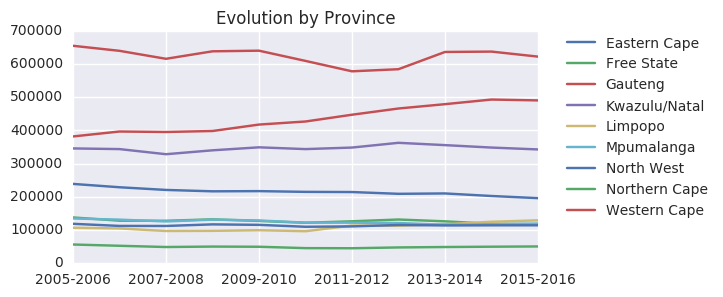

In [4]:
Crimes_Province[list].transpose().plot(kind='line',figsize=(6, 3))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Evolution by Province')

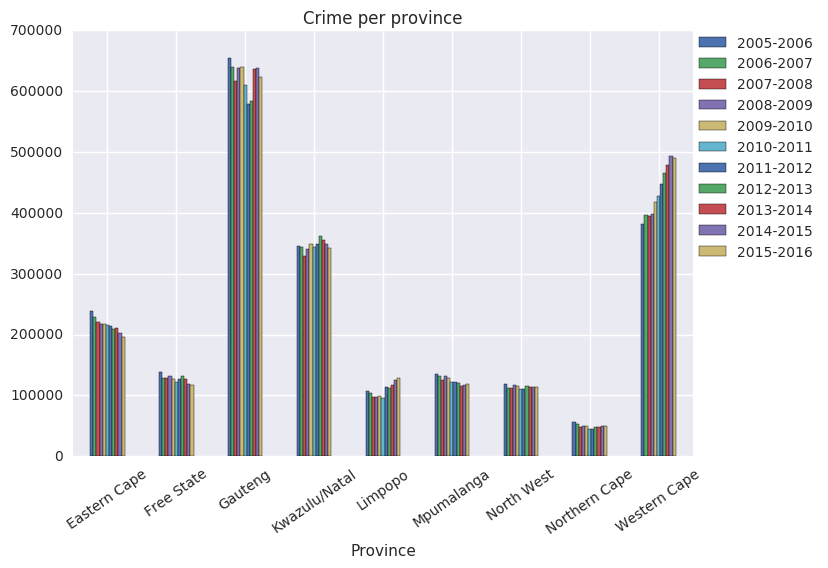

In [5]:
Crimes_Province.plot(kind='bar', rot=35)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.title('Crime per province')

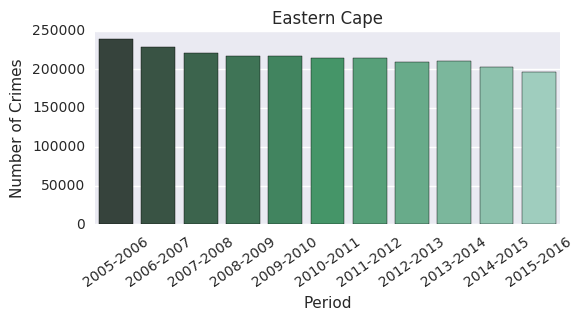

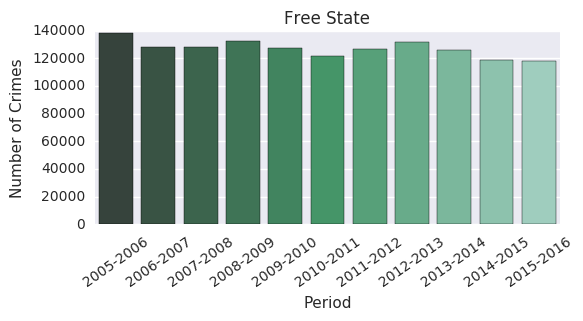

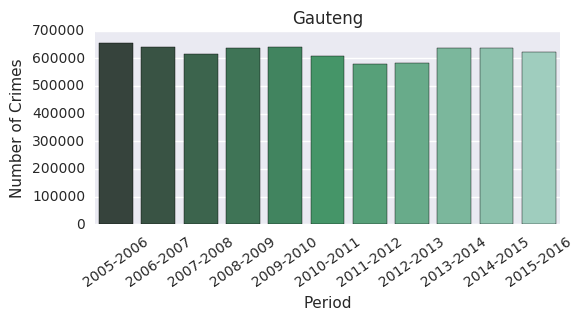

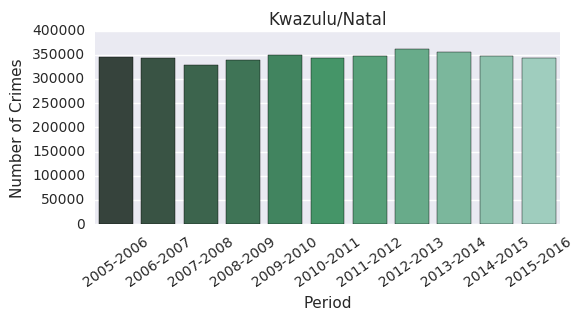

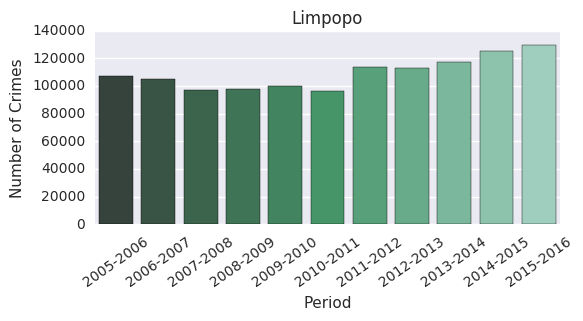

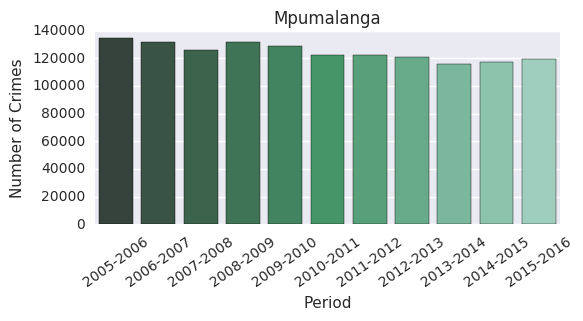

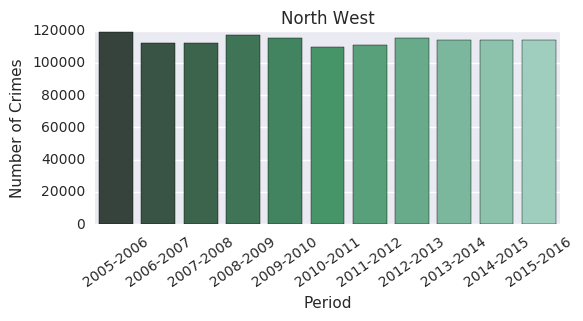

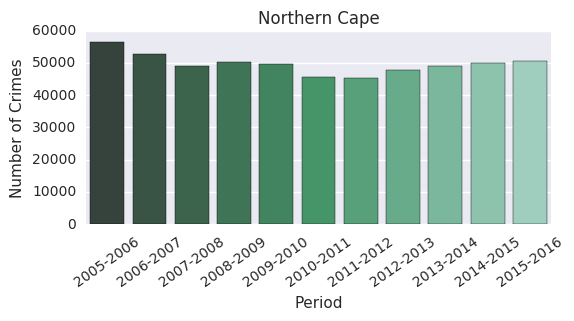

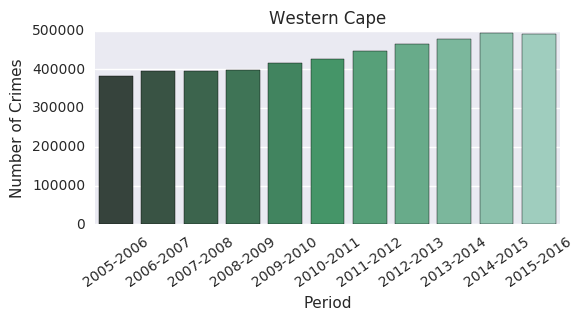

In [6]:
cols = Crimes_Province.transpose().columns
Crimes_Province_transpose = Crimes_Province.transpose()
Crimes_Province_transpose['index'] = Crimes_Province_transpose.index

n_rows=9
n_cols=1

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=1,figsize=(6, 2.5))
    for j in range(n_cols):
        sns.barplot(Crimes_Province_transpose['index'], Crimes_Province_transpose[cols[i]],palette="BuGn_d")
        ax.set_ylabel("Number of Crimes")
        ax.set_xlabel("Period")
        ax.set_xticklabels(Crimes_Province_transpose['index'],rotation=35)
        plt.title(cols[i*n_cols+j])
        

/opt/conda/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


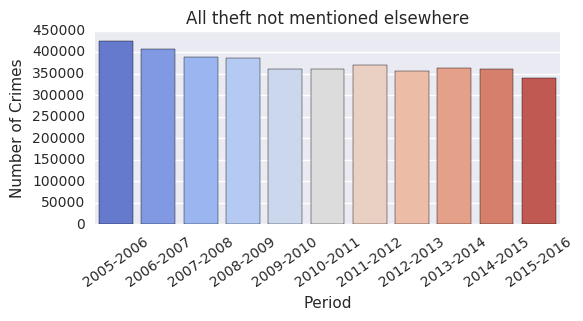

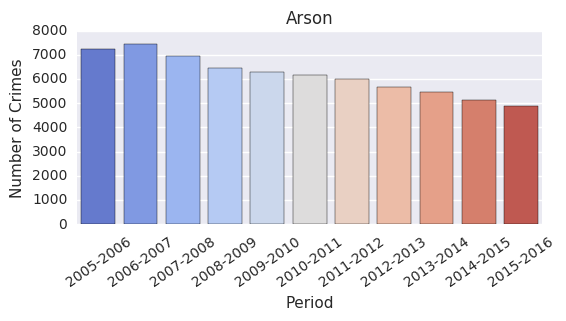

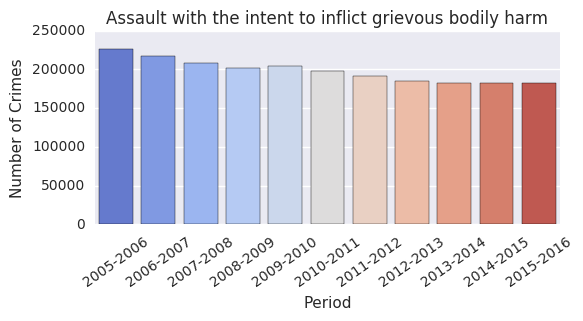

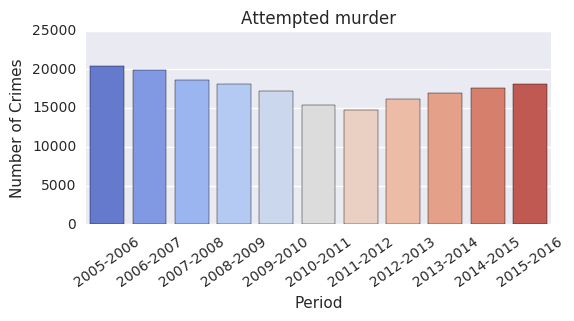

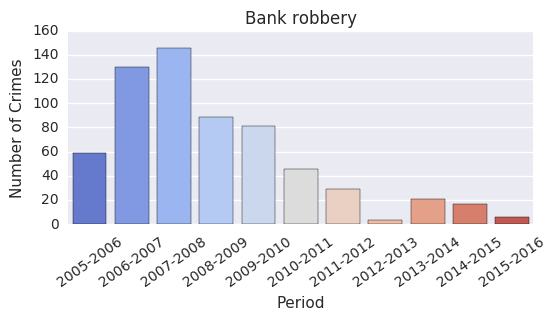

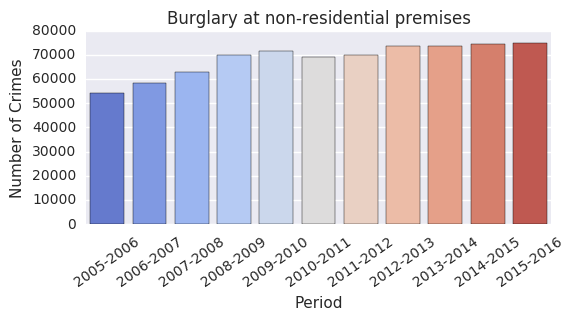

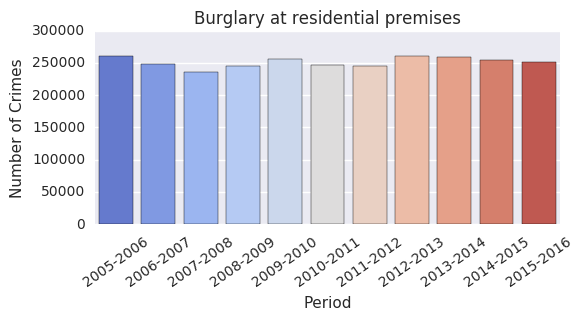

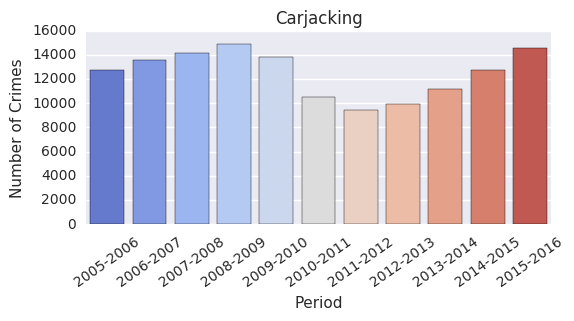

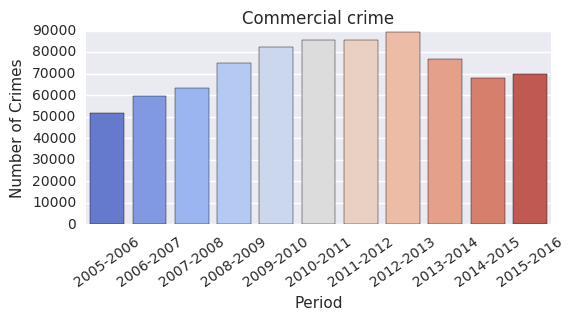

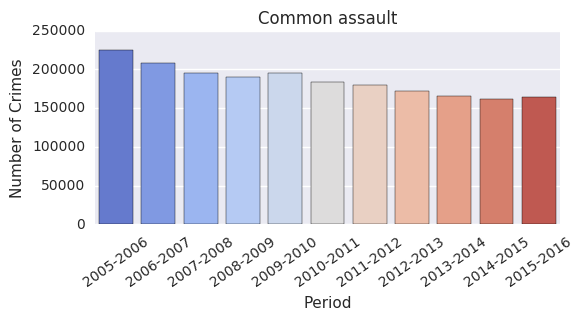

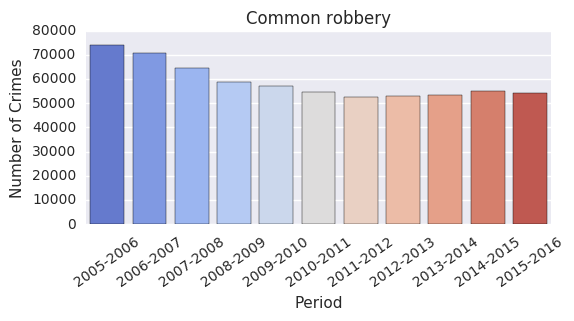

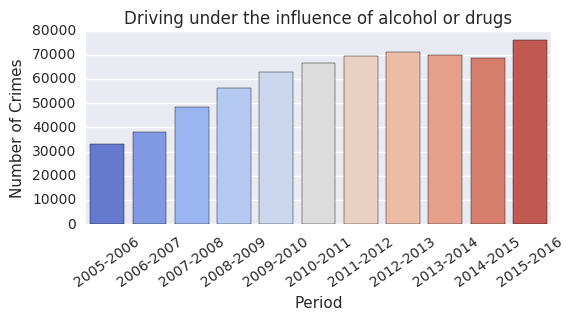

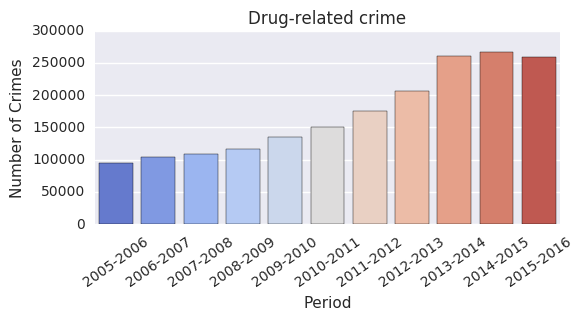

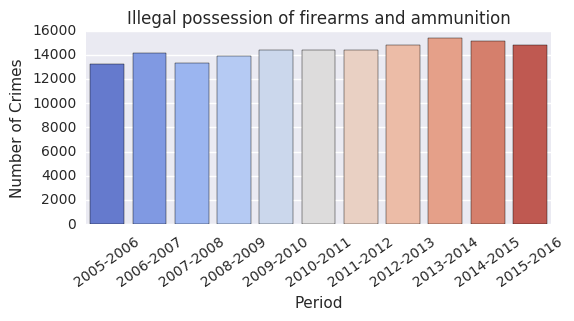

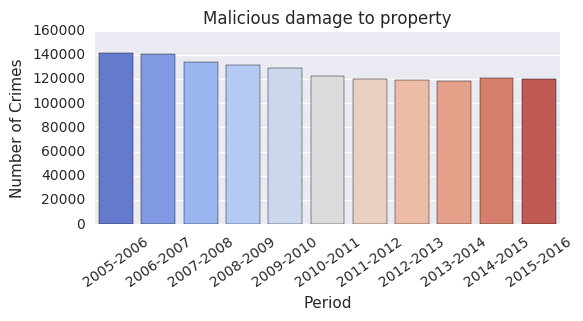

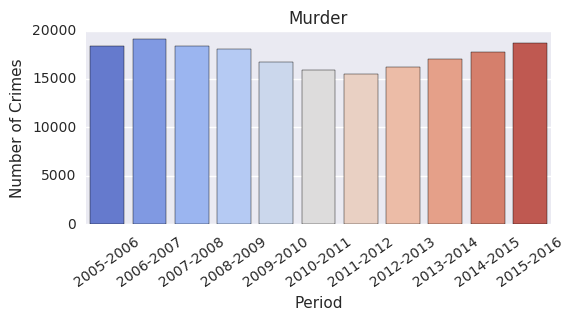

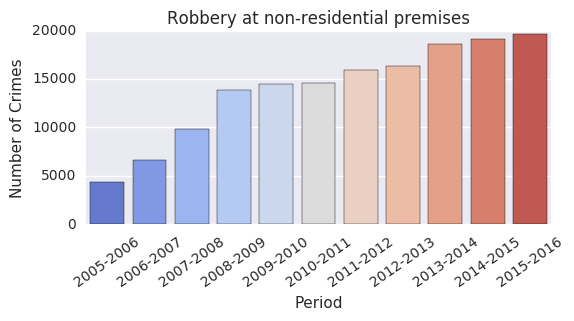

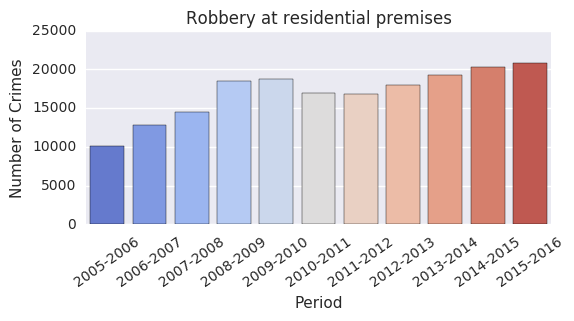

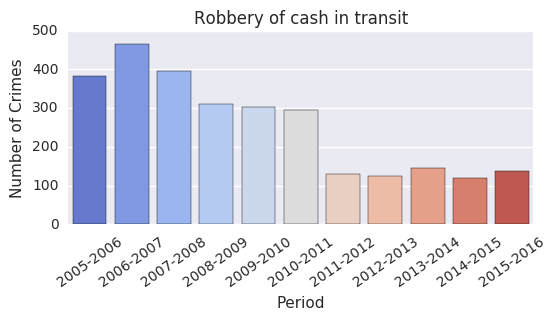

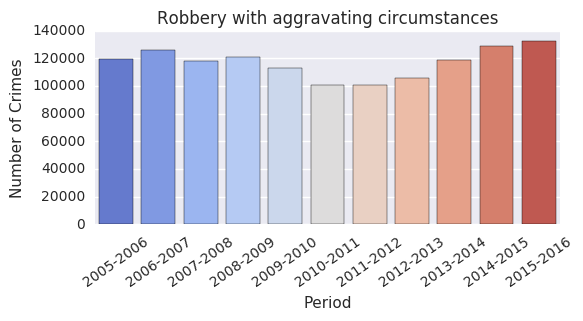

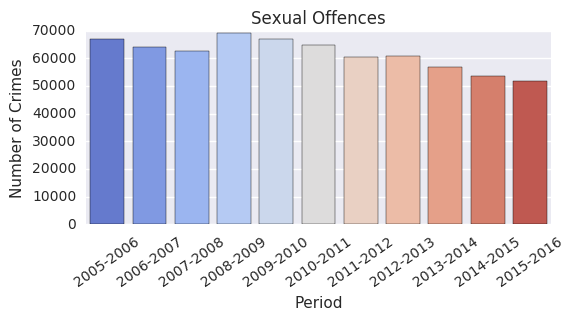

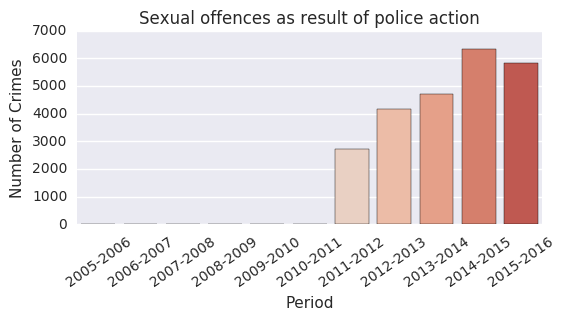

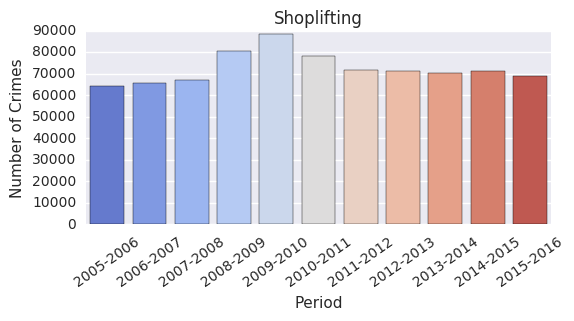

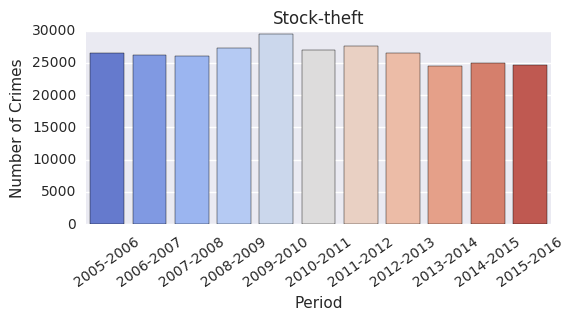

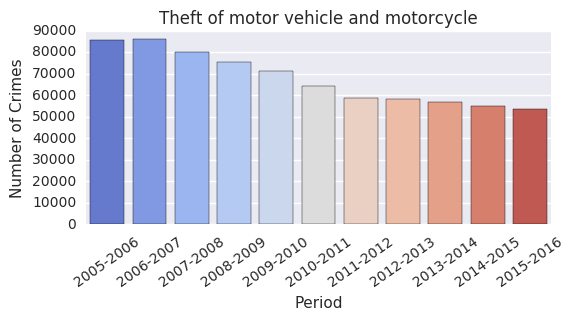

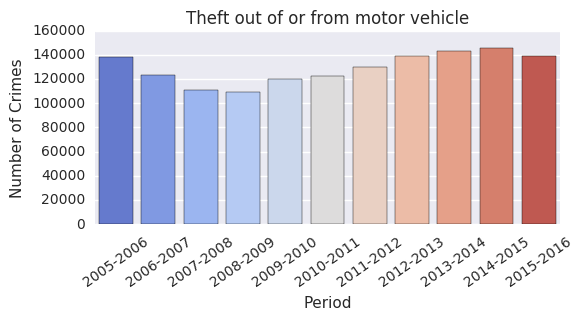

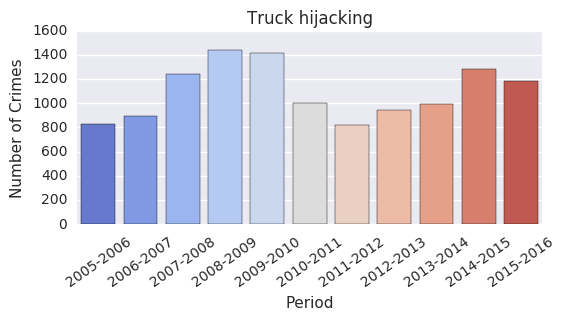

In [7]:
cols = Crimes_Category.transpose().columns
Crimes_Category_transpose = Crimes_Category.transpose()
Crimes_Category_transpose['index'] = Crimes_Category_transpose.index

n_rows=27
n_cols=1

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=1,figsize=(6, 2.5))
    for j in range(n_cols):
        sns.barplot(Crimes_Category_transpose['index'], Crimes_Category_transpose[cols[i]],palette="coolwarm")
        ax.set_ylabel("Number of Crimes")
        ax.set_xlabel("Period")
        ax.set_xticklabels(Crimes_Category_transpose['index'],rotation=35)
        plt.title(cols[i*n_cols+j])

In [8]:
year1=Crimes_Province['2005-2006'].reset_index()['2005-2006']
year2=Crimes_Province['2006-2007'].reset_index()['2006-2007']
year3=Crimes_Province['2007-2008'].reset_index()['2007-2008']
year4=Crimes_Province['2008-2009'].reset_index()['2008-2009']
year5=Crimes_Province['2009-2010'].reset_index()['2009-2010']
year6=Crimes_Province['2010-2011'].reset_index()['2010-2011']
year7=Crimes_Province['2011-2012'].reset_index()['2011-2012']
year8=Crimes_Province['2012-2013'].reset_index()['2012-2013']
year9=Crimes_Province['2013-2014'].reset_index()['2013-2014']
year10=Crimes_Province['2014-2015'].reset_index()['2014-2015']
year11=Crimes_Province['2015-2016'].reset_index()['2015-2016']

Evolution1 = pd.DataFrame((year2-year1)/year1)
Evolution1.columns = ['Evolution1']
Evolution1.index = Crimes_Province.index.values
Crimes_Province['Evolution1'] = Evolution1

Evolution2 = pd.DataFrame((year3-year2)/year2)
Evolution2.columns = ['Evolution2']
Evolution2.index = Crimes_Province.index.values
Crimes_Province['Evolution2'] = Evolution2

Evolution3 = pd.DataFrame((year4-year3)/year3)
Evolution3.columns = ['Evolution3']
Evolution3.index = Crimes_Province.index.values
Crimes_Province['Evolution3'] = Evolution3

Evolution4 = pd.DataFrame((year5-year4)/year4)
Evolution4.columns = ['Evolution4']
Evolution4.index = Crimes_Province.index.values
Crimes_Province['Evolution4'] = Evolution4

Evolution5 = pd.DataFrame((year6-year5)/year5)
Evolution5.columns = ['Evolution5']
Evolution5.index = Crimes_Province.index.values
Crimes_Province['Evolution5'] = Evolution5

Evolution6 = pd.DataFrame((year7-year6)/year6)
Evolution6.columns = ['Evolution6']
Evolution6.index = Crimes_Province.index.values
Crimes_Province['Evolution6'] = Evolution6

Evolution7 = pd.DataFrame((year8-year7)/year7)
Evolution7.columns = ['Evolution7']
Evolution7.index = Crimes_Province.index.values
Crimes_Province['Evolution7'] = Evolution7

Evolution8 = pd.DataFrame((year9-year8)/year8)
Evolution8.columns = ['Evolution8']
Evolution8.index = Crimes_Province.index.values
Crimes_Province['Evolution8'] = Evolution8

Evolution9 = pd.DataFrame((year10-year9)/year9)
Evolution9.columns = ['Evolution9']
Evolution9.index = Crimes_Province.index.values
Crimes_Province['Evolution9'] = Evolution9

Evolution10 = pd.DataFrame((year11-year10)/year10)
Evolution10.columns = ['Evolution10']
Evolution10.index = Crimes_Province.index.values
Crimes_Province['Evolution10'] = Evolution10

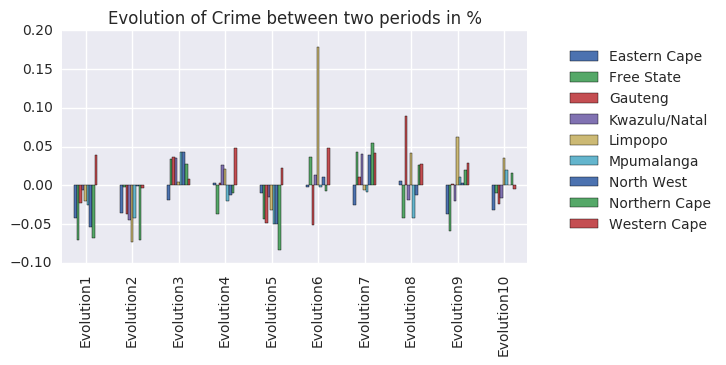

In [9]:
list2 = ['Evolution1','Evolution2','Evolution3','Evolution4','Evolution5','Evolution6'
        ,'Evolution7','Evolution8','Evolution9','Evolution10']
Crimes_Province[list2].transpose().plot(kind='bar',figsize=(6, 3))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1)
plt.title('Evolution of Crime between two periods in %')

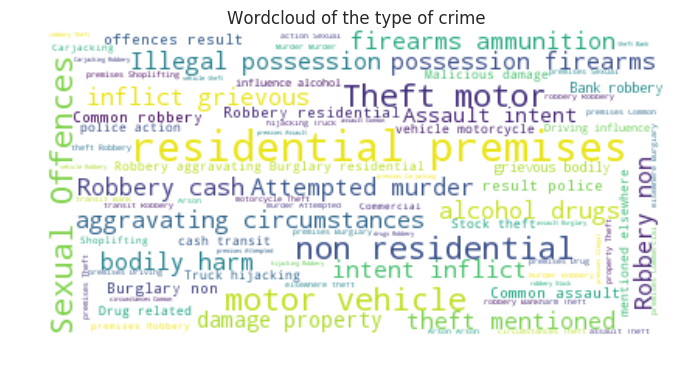

In [10]:
from wordcloud import WordCloud, STOPWORDS

def wordcloud_by_province(province):
    df_new = df[df.Province == province]
    stopwords = set(STOPWORDS)
    stopwords.add("Total")
    stopwords.add("Crime")
    stopwords.add("Crimes")
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 0).generate(" ".join([i for i in df_new['Category']]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Wordcloud of the type of crime")

wordcloud_by_province('Gauteng')   

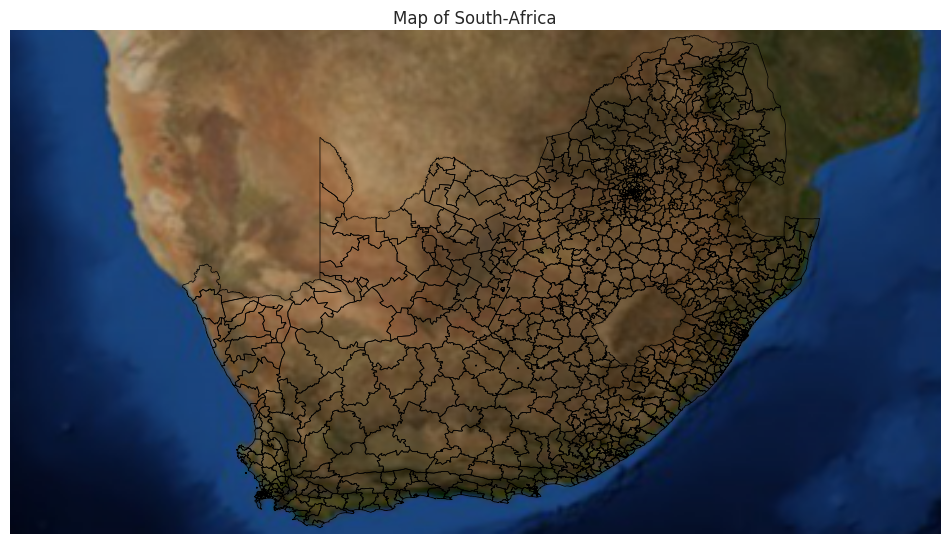

In [11]:
#Exploit Geospatial data
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import shapefile as shp  

plt.figure(figsize=(12,12))
map = Basemap(resolution='i',llcrnrlon=12,llcrnrlat=-35,urcrnrlat=-22,urcrnrlon=36,lat_0=-40,lon_0=0,)

#map.drawmapboundary(fill_color='aqua')
#map.fillcontinents(color='#ddaa66',lake_color='blue')
#map.drawcoastlines()
map.readshapefile('../input/Police_bounds', 'Police_bounds')
map.bluemarble()

plt.title("Map of South-Africa")
plt.show()

In [12]:
#import seaborn as sns
#sns.set()

# Load the example flights dataset and conver to long-form
#Crimes_Province = df.groupby(['Category'])['2005-2006','2006-2007','2007-2008','2008-2009',
#   '2009-2010','2010-2011','2011-2012','2012-2013','2013-2014','2014-2015','2015-2016'].sum()
#print(Crimes_Category_province)
# Draw a heatmap with the numeric values in each cell
#sns.heatmap(Crimes_Province.transpose(), annot=False, fmt="d", linewidths=.5)

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap

########################################
# Script Created by  KostyaBahshetsyan #
########################################

crime = pd.read_csv("../input/SouthAfricaCrimeStats_v2.csv")
crime['Category'].unique()
num_colors = 20
shapefile = '../input/Police_bounds'
crime['Station'] = crime['Station'].str.upper()
def group(category):

    group = crime[crime['Category'] == category ][['Station','Category', '2005-2006','2006-2007','2007-2008','2008-2009',
   '2009-2010','2010-2011','2011-2012','2012-2013','2013-2014','2014-2015','2015-2016']].groupby(['Station','Category'])['2005-2006','2006-2007','2007-2008','2008-2009',
   '2009-2010','2010-2011','2011-2012','2012-2013','2013-2014','2014-2015','2015-2016'].sum()
    group -= group.min()
    group /= group.max()
    
    for x in group.columns:
        values = group[x].values
        cm = plt.get_cmap('Reds')
        scheme = [cm(i / num_colors) for i in range(num_colors)]
        bins = np.linspace(values.min(), values.max(), num_colors)
        group['bin'] = np.digitize(values, bins) - 1


        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, axisbg='w', frame_on=False)
        fig.suptitle('Count of {} in South Afrika in {} per district.'.format(category, x), fontsize=20, y=.95)
                     
        m = Basemap(llcrnrlat=-40,
                 urcrnrlat=-20,
                 llcrnrlon=10,
                 urcrnrlon=40,
                 lat_0=-25, projection='merc')
       
        m.drawcoastlines()
        m.drawcountries()
        m.readshapefile(shapefile,'units', color='#444444', linewidth=.2)

        for info, shape in zip(m.units_info, m.units):
            name = info['COMPNT_NM']
            if name not in group.index.levels[0]:
                color = '#dddddd'
            else:
                color = scheme[group[group.index.levels[0] == name]['bin'].values]

            patches = [Polygon(np.array(shape), True)]
            pc = PatchCollection(patches)
            pc.set_facecolor(color)
            ax.add_collection(pc)

        # Draw color legend.
        ax_legend = fig.add_axes([0.1, 0.3, 0.8, 0.03], zorder=3)
        cmap = mpl.colors.ListedColormap(scheme)
        cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='horizontal')
        cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])

        plt.savefig('choropleth_{}_{}.png'.format(category,x), dpi=300, transparent=True)

In [14]:
#group('All theft not mentioned elsewhere')